In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Loading and Cleaning up

In [2]:
# Solve Here
import pandas as pd
import numpy as np
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] #columns
iris=pd.read_csv('/Users/andrearodriguez/Downloads/iris_not_clean.data', sep ='|' , skiprows=[1,34], names = names, engine='python' ) #import data

print("There are {} rows in the dataset.". format(iris.shape[0])) #number of rows in the dataframe
print("There are {} colums in the dataset.". format(iris.shape[1])) #number of columns in the dataframe
print("There are {} nulls in total in the dataset.". format (iris.isnull().sum().sum())) #total nans in the dataframe


There are 153 rows in the dataset.
There are 5 colums in the dataset.
There are 9 nulls in total in the dataset.


In [3]:
print("***Rows that contains nans and number of nans in each of these rows***") #title

iris[iris.isnull().any(axis=1)]# rows that contain nans

for i in range(len(iris.index)) : 
    nan_count=iris.iloc[i].isnull().sum()
    if nan_count>0:print("Nan in row ", i , " : " ,  iris.iloc[i].isnull().sum()) #number of nans per row 

***Rows that contains nans and number of nans in each of these rows***


,sepal-length,sepal-width,petal-length,petal-width,class
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


Nan in row  28  :  1
Nan in row  29  :  5
Nan in row  44  :  3


In [4]:
print("Nans in each columns:" , iris.isnull().sum(), sep='\n')

Nans in each columns:
sepal-length    2
sepal-width     1
petal-length    2
petal-width     2
class           2
dtype: int64


In [5]:
print("Sample 35th:" , iris.loc[36,:], sep='\n') #since one row was skip the 35th sample is the 36th in this case

print("      ") #space

print("Sample 38th:" , iris.loc[39,:], sep='\n') #since one row was skip the 38th sample is the 39th in this case


Sample 35th:
sepal-length              5
sepal-width             3.2
petal-length            1.2
petal-width             0.2
class           Iris-setosa
Name: 36, dtype: object
      
Sample 38th:
sepal-length            4.4
sepal-width               3
petal-length            1.3
petal-width             0.2
class           Iris-setosa
Name: 39, dtype: object


In [6]:
iris.loc[36,'petal-width']=0.2 #fix in row 36, sample 35th.
print("Sample 35th corrected:" , iris.loc[36,:], sep='\n') #Display row 36

print("     ") #space

iris.loc[39,"sepal-width":"petal-length"]=3.6,1.4 #fix in row 39, sample 38th
print("Sample 38th corrected:" , iris.loc[39,:], sep='\n') #Display row 39

Sample 35th corrected:
sepal-length              5
sepal-width             3.2
petal-length            1.2
petal-width             0.2
class           Iris-setosa
Name: 36, dtype: object
     
Sample 38th corrected:
sepal-length            4.4
sepal-width             3.6
petal-length            1.4
petal-width             0.2
class           Iris-setosa
Name: 39, dtype: object


# Stastical Exploring

In [7]:
# Solve Here

print("The Mean for each column is:" , iris.mean(axis=0), sep='\n') #mean for each column 
print("    ")
print("The Variance for each column is:" , iris.var(axis=0), sep='\n') #variance for each column
print("    ")
print("Descriptive Statistics:",iris.describe(),  sep='\n') #descriptive statistics

The Mean for each column is:
sepal-length    5.833775
sepal-width     3.061184
petal-length    3.747682
petal-width     1.192053
dtype: float64
    
The Variance for each column is:
sepal-length    0.694918
sepal-width     0.188351
petal-length    3.110645
petal-width     0.585136
dtype: float64
    
Descriptive Statistics:
       sepal-length  sepal-width  petal-length  petal-width
count    151.000000   152.000000    151.000000   151.000000
mean       5.833775     3.061184      3.747682     1.192053
std        0.833618     0.433994      1.763702     0.764942
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.325000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
iris=iris.dropna() #drop nan rows

print("The Mean for each column after dropping nan is:" , iris.mean(axis=0), sep='\n') #mean for each column after dropping nans
print("    ")

print("The Variance for each column after dropping nan is:" , iris.var(axis=0), sep='\n') #variance for each column after dropping nans
print("    ")

The Mean for each column after dropping nan is:
sepal-length    5.838000
sepal-width     3.058000
petal-length    3.758667
petal-width     1.198667
dtype: float64
    
The Variance for each column after dropping nan is:
sepal-length    0.696868
sepal-width     0.189969
petal-length    3.113179
petal-width     0.582414
dtype: float64
    


In [9]:
#Correlation between the fourth column and each of the other three columns individually
print("The correlation between the petal-width column and each of the other attributes is:" , iris.corr().iloc[3,:-1], sep='\n')
print("  ")
print("***Observations: there is a high positive correlation between petal-width and sepal-length(0.82), as well as with petal-length(0.96). However, there is a negative correlation between petal-width and sepal-width.*** ")

The correlation between the petal-width column and each of the other attributes is:
sepal-length    0.819785
sepal-width    -0.366785
petal-length    0.962757
Name: petal-width, dtype: float64
  
***Observations: there is a high positive correlation between petal-width and sepal-length(0.82), as well as with petal-length(0.96). However, there is a negative correlation between petal-width and sepal-width.*** 


In [10]:
print("Number of records per each class:",iris.groupby('class').size(), sep='\n') #number of records per each class.

Number of records per each class:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [11]:
np.random.seed(1234)
iris.sample(20) #randomly pick 20 samples of the data and display it

,sepal-length,sepal-width,petal-length,petal-width,class
94,6.1,3.0,4.6,1.4,Iris-versicolor
66,6.1,2.9,4.7,1.4,Iris-versicolor
106,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
62,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
102,5.7,2.8,4.1,1.3,Iris-versicolor
125,7.7,2.8,6.7,2.0,Iris-virginica


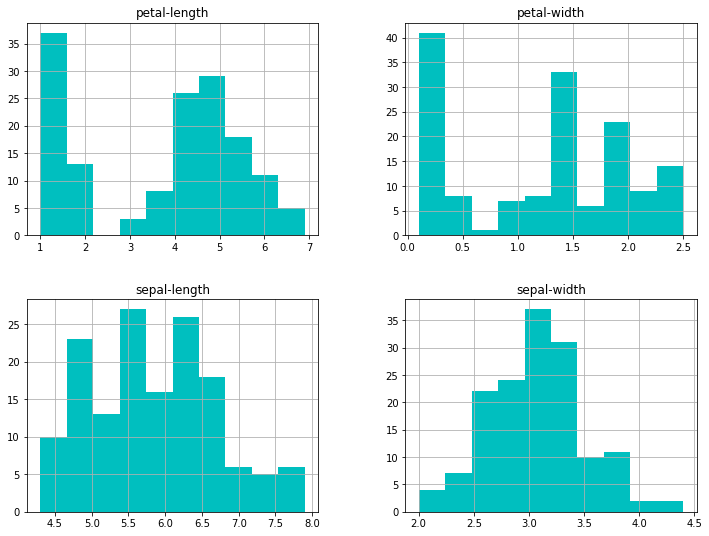

In [15]:
#Plot histogram for all the data attributes
import matplotlib.pyplot as plt
iris.hist(color='c', figsize=(12,9))

plt.show();

<Figure size 432x288 with 0 Axes>

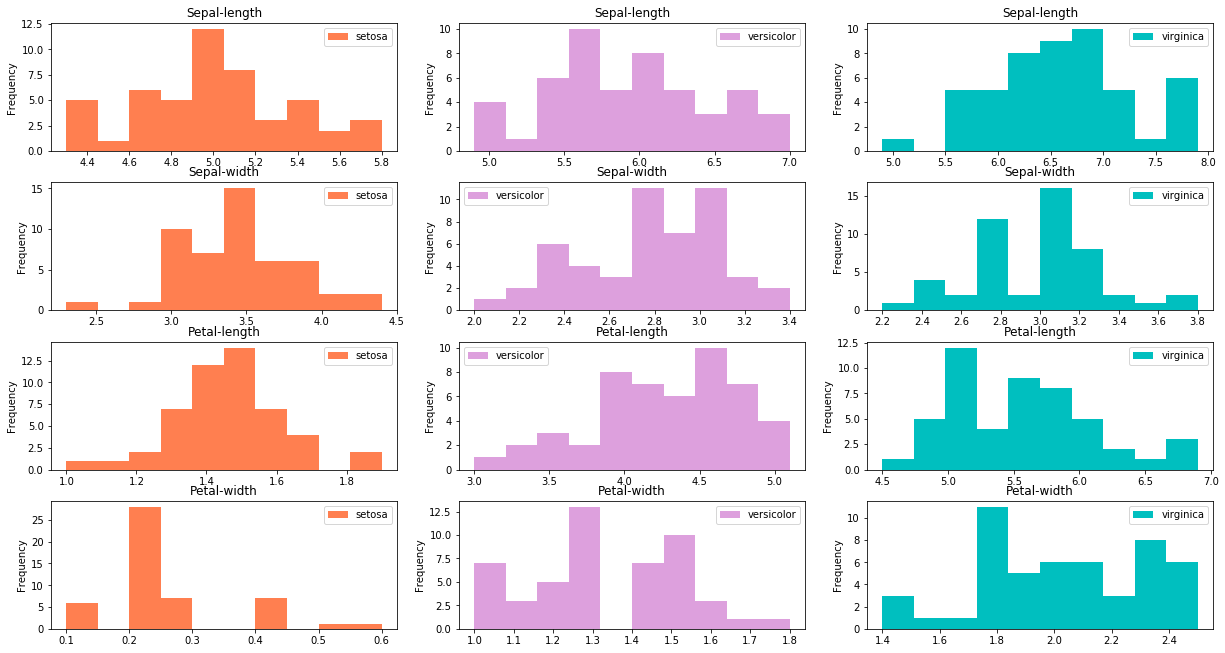

In [16]:
plt.figure()
setosa=iris[iris['class']=='Iris-setosa']
versicolor =iris[iris['class']=='Iris-versicolor']
virginica =iris[iris['class']=='Iris-virginica']

fig,ax=plt.subplots(4,3,figsize=(17, 9))
i=0
for col in iris.columns[:-1]:
    setosa[col].plot(kind="hist", ax=ax[i][0],label="setosa",color ='coral')
    versicolor[col].plot(kind="hist", ax=ax[i][1],label="versicolor",color='plum')
    virginica[col].plot( kind="hist",ax=ax[i][2],label="virginica",color='c')
    i=i+1
    
plt.tight_layout()

title_name=""
for i in range(4):
    for j in range(3):
        if i==0:
            title_name="Sepal-length"
        elif i==1:
            title_name="Sepal-width"
        elif i==2:
            title_name="Petal-length"
        elif i==3:
            title_name="Petal-width"
            
        ax[i][j].set(title=title_name)
        ax[i][j].legend()
plt.show();


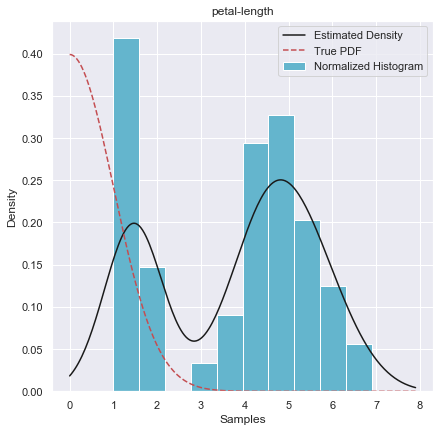

In [50]:
# Solve Here
import scipy.stats

x1 = iris['petal-length']
xs = np.linspace(x1.min()-1, x1.max()+1, 200)

kde1 = scipy.stats.gaussian_kde(x1)

fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(x1, density=True, label='Normalized Histogram',color='c') # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test fit
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label="True PDF")  # show the real distribution
plt.title('petal-length')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend();

In [52]:
scipy.stats.ttest_1samp(kde1.resample(500)[0],x1.mean()) 
print("***Observation: we can say that the mean of the data is close to the sample data since it has a high pvalue .*** ")

Ttest_1sampResult(statistic=0.4051482389224864, pvalue=0.6855421827642274)

***Observation: we can say that the mean of the data is close to the sample data since it has a high pvalue .*** 


### PCA

- Original shape:    (150, 4)
- Transformed shape: (150, 3)
[0.92477136 0.05243356 0.01751957]


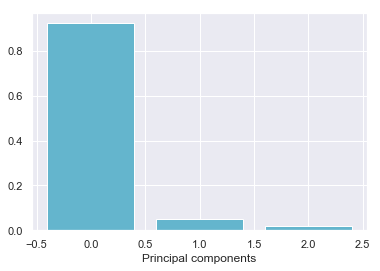

In [49]:
# Solve Here
from sklearn.decomposition import PCA

X = iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y=iris['class']
pca_all = PCA(n_components=3) #create a PCA model to reduce the current number of features
reduced_data_pca = pca_all.fit_transform(X)
print("- Original shape:   ", X.shape)
print("- Transformed shape:", reduced_data_pca.shape)
print (pca_all.explained_variance_ratio_)
size = len(pca_all.explained_variance_ratio_)
plt.bar(x = range(size),height = pca_all.explained_variance_ratio_, color='c')
plt.xlabel('Principal components');


# Part 4: Machine Learning


### Non-Supervised Learning 


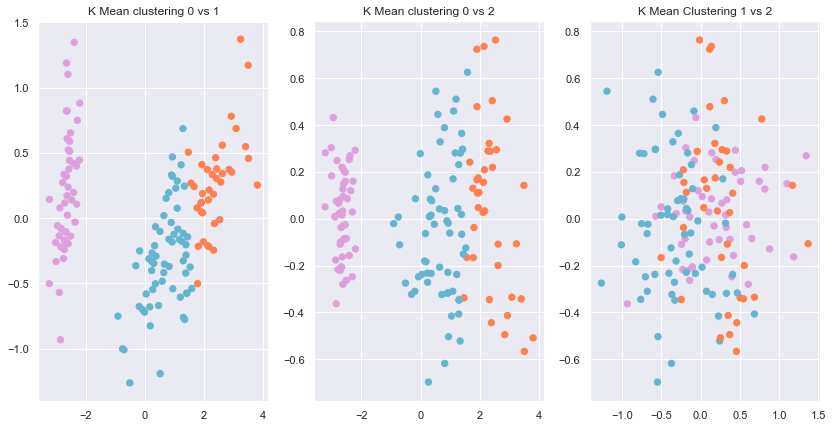

In [25]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3) #divide data into different clusters
kmeans.fit(reduced_data_pca)

#plot clusters
plt.figure(figsize=(14,7))
colormap = np.array(['coral', 'plum', 'c'])

plt.subplot(1, 3, 1)
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,1], c=colormap[kmeans.labels_], s=40)
plt.title('K Mean clustering 0 vs 1')
plt.subplot(1, 3, 2)
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,2], c=colormap[kmeans.labels_], s=40)
plt.title('K Mean clustering 0 vs 2')
plt.subplot(1, 3, 3)
plt.scatter(reduced_data_pca[:,1],reduced_data_pca[:,2], c=colormap[kmeans.labels_], s=40)
plt.title('K Mean Clustering 1 vs 2');


### Supervised-Learning


In [21]:
# Solve Here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train,y_test = train_test_split(reduced_data_pca, y, test_size=0.2) # splits the data into 20% validation and 80% training
model = LogisticRegression(solver='lbfgs',multi_class='auto') #build the model
model.fit(x_train, y_train) #fit the model
prediction = model.predict(x_test)
print(" ")
print('The accuracy of Logistic Regression is: ',model.score(x_test, y_test)) #Accuracy of model

print('The accuracy of the training data is {:.2f}'.format(model.score(x_train, y_train))) #Training data accuracy 
print('The accuracy of the test data is {:.2f}'.format(model.score(x_test, y_test))) #Test data accuracy

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

 
The accuracy of Logistic Regression is:  0.9666666666666667
The accuracy of the training data is 0.97
The accuracy of the test data is 0.97


In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prediction) #confusion matrix
print(cm)

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1 12]]


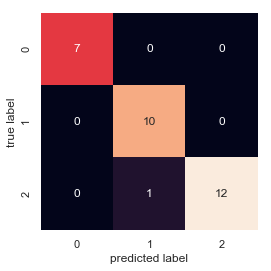

In [24]:
#plot confusion matrix
import seaborn as sns; sns.set()  
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.ylabel('true label')
plt.xlabel('predicted label');